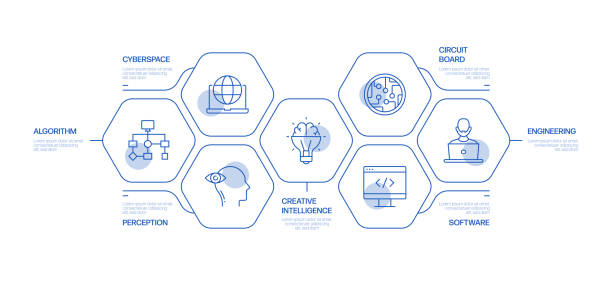

# <font color='#4a8bad'>Table of contents</font>
***

* [1. Participants profile](#profile)
    * [1.1. Gender distribution](#gender)
    * [1.2. Age distribution by gender](#age)
    * [1.3. Where do participants come from?](#country)
    * [1.4. Academic qualifications](#qualifications)
    * [1.5. Job Titles](#job)
    * [1.6. Working industry](#industry)
    * [1.7. Experience in coding](#experience)
    * [1.8. Experience in ML](#MLexperience)  
    

* [2. The most popular choice](#choice)
    * [2.1. Programming languages](#programming)
    * [2.2. IDE](#IDE)
    * [2.3. Notbook](#notebook)
    * [2.4. Specialized hardware](#hardware)
    * [2.5. TPU](#TPU)
    * [2.6. Visualization libraries](#visualization)
    * [2.7. ML frameworks](#MLframework)
    * [2.8. ML algorithms](#MLalgorithms)
    * [2.9. DS/ML courses](#course)    
    
 
* [3. What do experienced participants say?](#choice3)
    * [3.1. Programming languages](#programming3)
    * [3.2. IDE](#IDE3)
    * [3.3. Notbook](#notebook3)
    * [3.4. Specialized hardware](#hardware3)
    * [3.5. TPU](#TPU3)
    * [3.6. Visualization libraries](#visualization3)
    * [3.7. ML frameworks](#MLframework3)
    * [3.8. ML algorithms](#MLalgorithms3)
    * [3.9. DS/ML courses](#course3) 
    
    
 * [4. Which tools are most useful to your job?](#choice4)
    * [4.1. Programming languages](#programming4)
    * [4.2. IDE](#IDE4)
    * [4.3. Notbook](#notebook4)
    * [4.4. Specialized hardware](#hardware4)
    * [4.5. TPU](#TPU4)
    * [4.6. Visualization libraries](#visualization4)
    * [4.7. ML frameworks](#MLframework4)
    * [4.8. ML algorithms](#MLalgorithms4)
    * [4.9. DS/ML courses](#course4) 



# <font color='#4a8bad'>Data preparation</font>

In [ ]:
! pip install pywaffle

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage,AnchoredOffsetbox
import seaborn as sns
from pywaffle import Waffle
%matplotlib inline
import plotly.express as px
import squarify
import warnings
warnings.filterwarnings("ignore")
import re


# Setting for charts
facecolor_fig = '#efeeee'
facecolor_axes = '#efeeee'
main_color = '#80ddd9'
label_color = '#658189'

In [ ]:
raw = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')
raw.head()

In [ ]:
# print list to see where each data located
data_location = []
for i, name in enumerate(raw.columns):
    data_location.append([i,name, raw.iloc[0,i]])
data_location = pd.DataFrame(data_location)
data_location.columns = ['columns', 'q_num', 'question']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
data_location

In [ ]:
pd.reset_option('^display.', silent=True)
column_name = raw.columns.str.replace(r'_Part([\s\S])*', '', regex=True).str.replace('_OTHER', '')
data = raw.iloc[1:,:]
data.columns = column_name

# <font color='#4a8bad'>1. Participants profile</font>
<a id="profile"></a>
***

## <font color='#4a8bad'>1.1. Gender distribution</font>
<a id="gender"></a>

In [ ]:
gender = data.groupby('Q2')['Q2'].count()

In [ ]:
gender_plot = {'Male': 91, 'Female': 19}
fig = plt.figure(figsize=(12,20),
    FigureClass=Waffle, 
    rows=5, 
    values=gender_plot, 
    colors=["#609de3", "#f09488"],
    icons=['male', 'female'], 
    icon_size = 30,
    interval_ratio_y=0.5,
    facecolor=facecolor_fig
)
plt.legend([])
plt.text(x=0, y=1.1,s='       ', ha='right')
plt.text(x=0, y=-0.1,s='       ', ha='right')
plt.text(x=0, y=1.05, 
              s='Male dominates in the Data Science space',
              fontfamily='serif', fontsize=18, color ='#1a4f76', va='bottom', fontweight='bold')

fig.text(x=0.42, y=0.5, s="81%", 
             ha="center", va="center", fontsize=40, color='gray', alpha=0.5,
             bbox={'boxstyle': 'square', 'lw': 3, 'ec': 'gray', 'fc': (0.9, 0.9, 0.9, 0.5), 'alpha': 0.3})

fig.text(x=0.89, y=0.5, s="19%", 
             ha="center", va="center", fontsize=40, color='gray', alpha=0.5,
             bbox={'boxstyle': 'square', 'lw': 3, 'ec': 'gray', 'fc': (0.9, 0.9, 0.9, 0.5), 'alpha': 0.3})
plt.show()

## <font color='#4a8bad'>1.2. Age distribution by gender</font>
<a id="age"></a>

In [ ]:
# Age distribution
age = data.groupby('Q1')['Q1'].count()
# Age distribution by gender
gender_age = pd.crosstab(index=data.Q1, columns=data.Q2).sort_values(by='Q1', ascending=False).loc[:, ['Man', 'Woman']]
gender_age[['pct_man', 'pct_woman']] =gender_age.div(gender_age.sum(axis=0), axis=1) 

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,6),  facecolor = facecolor_fig)
ax[0].patch.set_facecolor(facecolor_axes)

# Age distribution plot
ax[0].barh(width=age, y=age.index, align='center', color=main_color)

for _, spine in ax[0].spines.items():
    spine.set_visible(False)
ax[0].invert_yaxis()
ax[0].tick_params(length=0, width=0)
ax[0].set_xlabel('(No. of participants)',  color='k', size=12, x=1, ha='right')

# Label values 
values = age.values
for i, value in enumerate(values):
    ax[0].text(value+50 , i , int(value), va='center', 
                 color=label_color, fontweight='bold', alpha=0.8, size=10)
    
#------------------------------------------------------------------------------------------------------------------------------------

# Age and male distribution plot
ax[1].barh(y=gender_age.index, width=gender_age['pct_man'], color='#609de3')
ax[1].patch.set_facecolor(facecolor_axes)
ax[1].set_yticks([])
for _, spine in ax[1].spines.items():
    spine.set_visible(False)
ax[1].tick_params(length=0, width=0)
ax[1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0)) #Format x axis to % without decimals
ax[1].set_xlabel('(% of male participants)',  color='k', size=12, x=-0.05, ha='left')
ax[1].set_xlim(0,0.25)
ax[1].invert_xaxis()

# Label values 
values =gender_age['pct_man'].values
for i, value in enumerate(values):
    ax[1].text(value+0.002 , i , '{:.1f}%'.format(value*100), va='center', 
                 color='#609de3', fontweight='bold', alpha=0.8, size=10, ha='right')
    
#--------------------------------------------------------------------------------------------------------------------------------------------

# Age and female distribution plot
ax[2].barh(y=gender_age.index, width=gender_age['pct_woman'], color='#f09488')
ax[2].patch.set_facecolor(facecolor_axes)
for _, spine in ax[2].spines.items():
    spine.set_visible(False)
ax[2].tick_params(length=0, width=0)
ax[2].tick_params(axis='y',pad=20)
ax[2].xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0)) 
ax[2].set_xlabel('(% of female participants)', color='k', size=12, x=1.05, ha='right')
ax[2].set_xlim(0,0.25)
ax[2].set_ylabel('Age group', color='k', size=12, x=0, y=1, ha='left', rotation=0)

# Label values 
values =gender_age['pct_woman'].values
for i, value in enumerate(values):
    ax[2].text(value+0.002 , i , '{:.1f}%'.format(value*100), va='center', 
                 color='#f09488', fontweight='bold', alpha=0.8, size=10, ha='left')    
    
#--------------------------------------------------------------------------------------------------------------------------------------------    
    
# Figurue comment    
plt.suptitle(x=0.05, y=1,t="Younger geneatrations embrace new technology", ha='left',
                     fontsize=20, fontfamily='serif',fontweight='bold', color='#1a4f76')
ax[0].text(x=0.05, y=0.9,ha='left',
                  s='More than half of participants were below age 30',
                  fontsize=14, fontfamily='serif', color='#1a4f76', alpha=0.8,           
                  transform=fig.transFigure)    

plt.tight_layout()    

## <font color='#4a8bad'>1.3. Where do participants come from?</font>
<a id="country"></a>

In [ ]:
data['Q3'] = data['Q3'].replace(['United States of America','United Kingdom of Great Britain and Northern Ireland'],['USA','UK'])
country = data.groupby('Q3')['Q3'].count()
country_top20 = pd.DataFrame(country).drop(index='Other').nlargest(20,['Q3'])

In [ ]:
fig = plt.figure(figsize=(15,8), facecolor=facecolor_fig)
ax = country_top20['Q3'].plot(kind='barh', color=main_color)
ax.patch.set_facecolor(facecolor_axes)

# Remove chart frame
for _, spine in ax.spines.items():
    spine.set_visible(False)

ax.tick_params(length=0, width=0)

ax.set_ylabel('')
ax.set_xlabel('No. of participants', x=1, ha='right')

# Label values 
values = country_top20['Q3'].values
for i, value in enumerate(values):
    ax.text(value+50 , i , int(value), va='center', 
                 color='#658189', fontweight='bold', alpha=0.8)
    
ax.invert_yaxis()

plt.title(x=0.05, y=0.9, label='More than 7,000 Indian pariticated in the Kaggle Survey', ha='left', va='bottom', transform=fig.transFigure,
              size=20, fontfamily='serif', fontweight='bold', color = '#1a4f76' )
plt.show()

## <font color='#4a8bad'>1.4. Academic Qualifications</font>
<a id="qualifications"></a>

In [ ]:
# Education background
# Rename 
education_name = ['I prefer not to answer', 'Some college/university study without earning a bachelor’s degree', 'No formal education past high school']
education_replace = ['Not disclosed','College', 'High school']
data['Q4'] = data['Q4'].replace(education_name, education_replace)
qualification_index =['Professional doctorate', 'Doctoral degree', 'Master’s degree', 'Bachelor’s degree', 'College', 'High school','Not disclosed']

# Qualification distribution
education = data.groupby('Q4')['Q4'].count()
education = pd.DataFrame(education, index=qualification_index)

# Qualification distribution by gender
edu_gender = pd.crosstab(index=data.Q4, columns=data.Q2).loc[:, ['Man', 'Woman']]
edu_gender[['pct_man', 'pct_woman']] =edu_gender.div(edu_gender.sum(axis=0), axis=1) 
edu_gender = pd.DataFrame(edu_gender, index=qualification_index)

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12,4), facecolor = facecolor_fig)

# Education distribution
sns.barplot(x=education['Q4'], y=education.index, ax=ax[0], color=main_color)
ax[0].patch.set_facecolor(facecolor_axes)
for _, spine in ax[0].spines.items():
    spine.set_visible(False)
ax[0].invert_yaxis()
ax[0].tick_params(length=0, width=0)
ax[0].set_xlabel('No. of participants', size=10)
ax[0].invert_yaxis()

# Label values 
values = education['Q4'].values
for i, value in enumerate(values):
    ax[0].text(value+50 , i , int(value), va='center', 
                 color='#658189', fontweight='bold', alpha=0.8, size=10)

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Education and male distribution
sns.barplot(x=edu_gender['pct_man'], y=edu_gender.index, ax=ax[1], color='#609de3')
ax[1].patch.set_facecolor(facecolor_axes)
ax[1].set_yticks([])
for _, spine in ax[1].spines.items():
    spine.set_visible(False)
ax[1].tick_params(length=0, width=0)
ax[1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0)) #Format x axis to % without decimals
ax[1].set_xlabel('(% of male participants)',  color='k', size=10, x=-0.05, ha='left')
ax[1].set_xlim(0,0.5)
ax[1].invert_xaxis()

# Label values 
values =edu_gender['pct_man'].values
for i, value in enumerate(values):
    ax[1].text(value+0.002 , i , '{:.1f}%'.format(value*100), va='center', 
                 color='#609de3', fontweight='bold', alpha=0.8, size=10, ha='right')
    
    
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Education and female distribution
sns.barplot(x=edu_gender['pct_woman'], y=edu_gender.index, ax=ax[2], color='#f09488')
ax[2].patch.set_facecolor(facecolor_axes)
ax[2].set_yticks([])
for _, spine in ax[2].spines.items():
    spine.set_visible(False)
ax[2].tick_params(length=0, width=0)
ax[2].xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0)) 
ax[2].set_xlabel('(% of female participants)', color='k', size=10, x=1.05, ha='right')
ax[2].set_xlim(0,0.5)

# Label values 
values =edu_gender['pct_woman'].values
for i, value in enumerate(values):
    ax[2].text(value+0.002, i , '{:.1f}%'.format(value*100), va='center', 
                 color='#f09488', fontweight='bold', alpha=0.8, size=10, ha='left')
    
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plot comment
plt.suptitle(x=0, y=1, ha='left',
                     t="The majority of participants has higher education qualifications", 
                     fontsize=20, fontfamily='serif',fontweight='bold', color='#1a4f76')
plt.show()

## <font color='#4a8bad'>1.5. Job Titles</font>
<a id="job"></a>

In [ ]:
# Job title
# Rename some long titles
job_dist_name = ['DBA/Database Engineer', 'Developer Relations/Advocacy','Program/Project Manager', 'Product Manager']
job_dist_repalce = ['DBA', 'DevRel', 'Program/Project Mgr',  'Product Mgr']
data['Q5'] = data['Q5'].replace(job_dist_name, job_dist_repalce)

job = pd.DataFrame(data.groupby('Q5')['Q5'].count())
job['pct'] = job/len(data) *100
job = job.sort_values(by='pct', ascending=False)

In [ ]:
fig = plt.figure(figsize=(12,6), facecolor = facecolor_fig)

labels = ["%s\n %.1f %%" % label for label in zip(job.index, job['pct'])]
squarify.plot(job['Q5'], label=labels, 
                        color=plt.cm.Pastel2.colors, linewidth=2, edgecolor='w', alpha=0.8)
plt.axis('off')
plt.title("Participants' job title", x=0.01, y=.95, ha='left',
               size=16, fontfamily='serif', fontweight='bold', color = '#1a4f76' , transform=fig.transFigure)
plt.tight_layout()

## <font color='#4a8bad'>1.6. Working industry</font>
<a id="industry"></a>

In [ ]:
# Scatter plot to show requetions of reponse for questions with multiple answers
def mc_question_plot(x, y, question):
    # Prepare scatter plot
    fig = plt.figure(figsize=(10,5), facecolor = facecolor_fig)
    plt.scatter(x=x, y=y, s=50, color=main_color)

# Label data point
    for i, label in enumerate(x):
        plt.gca().annotate("%.1f %%" % (label*100), (x[i]+x.max()*0.02, y[i]), ha='left', va='center',
                                          color= '#1a4f76', alpha=0.8)

# Format chart
    plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
    plt.gca().set_xlim(0,x.max()*1.1)
    plt.gca().invert_yaxis()

    plt.gca().patch.set_facecolor(facecolor_axes)
    for _, spine in plt.gca().spines.items():
        spine.set_visible(False)
    plt.gca().tick_params(direction='out', length=0, width=0, pad=15)
    plt.grid(linestyle='--', alpha=0.5)
    plt.xlabel('% of participants', x=1, ha='right')
    plt.xlim(0,x.max()*1.1)
    
# Add title and make it aligned to the left    
    bbox_list = []
    plt.gcf().canvas.draw()
    ticklabels = [label for label in plt.gca().get_yticklabels()]   
    for i, label in enumerate(ticklabels):
        bbox_list.append(label.get_window_extent().x0)   # to get a list of coordiantes for the yticklabels
    min_label = min(bbox_list)  # find the x-coodiante that lies at the most left
    x,_ = plt.gca().transAxes.inverted().transform([min_label, 0])
    plt.title(question, x=x, y=1.05, ha='left',
                   size=16, fontfamily='serif', fontweight='bold', color = '#1a4f76')  

In [ ]:
# Q20: In what industry is your current employer/contract (or your most recent employer if retired)?
Q20 = pd.DataFrame(data.loc[:,'Q20'])
Q20_count = pd.DataFrame(Q20.groupby('Q20')['Q20'].count().sort_values(ascending=False))
Q20_count['pct'] = Q20_count/Q20_count.sum(axis=0)

# data for scatter plot
x = Q20_count['pct']
y = Q20_count.index
question = "In what industry is your current employer/contract?"
mc_question_plot(x, y, question)# data for scatter plot

## <font color='#4a8bad'>1.7. Experience in coding</font>
<a id="experience"></a>

In [ ]:
# Q6: For how many years have you been writing code and/or programming?
data['Q6'] = data['Q6'].replace('I have never written code', 'Never')

coding_exp = data.groupby('Q6')['Q6'].count()
Q6_index_order = ['Never', '< 1 years', '1-3 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
coding_exp = pd.DataFrame(coding_exp, index=Q6_index_order)
coding_exp['pct'] = coding_exp / coding_exp.sum()

In [ ]:
fig = plt.figure(figsize=(10,5), facecolor=facecolor_fig)
ax =coding_exp['Q6'].plot(kind='barh', color=main_color)
ax.patch.set_facecolor(facecolor_fig)

# Remove chart frame
for _, spine in ax.spines.items():
    spine.set_visible(False)

ax.tick_params(length=0, width=0)
ax.set_ylabel('')
ax.set_xlabel('No. of participants', x=1, ha='right')
ax.invert_yaxis()

# Label values 
values = coding_exp['Q6'].values
for i, value in enumerate(values):
    ax.text(value+50 , i , int(value), va='center', 
                 color='#658189', fontweight='bold', alpha=0.8)
    
plt.title(x=-0.02, y=0.9, label='Half of the participants have started coding in recent years', ha='left', va='bottom', transform=fig.transFigure,
              size=20, fontfamily='serif', fontweight='bold', color = '#1a4f76' )

plt.show()

In [ ]:
exp_age = pd.crosstab(index=data['Q6'], columns=data['Q1'], values=data['Q1'], aggfunc='count', margins=True)
exp_age = pd.DataFrame(exp_age, index=Q6_index_order)
# Above table in percentage form
exp_age_pct = np.round((exp_age / exp_age.sum(axis=0)) *100,1)
# Melt dataframe, so only contains 'coding experience', ' age' and '% values'
exp_age_pct.reset_index(inplace = True)
age_cols = ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']
exp_age_melt = pd.melt(exp_age_pct, id_vars=['index'],value_vars=age_cols)

In [ ]:
fig = plt.figure(figsize=(10,8), facecolor = facecolor_fig)
ax = sns.scatterplot(x='index', y='Q1', data=exp_age_melt, s=exp_age_melt['value']**1.6, c=exp_age_melt['value'], cmap='Blues_r', label='% participants in each age group')
ax.patch.set_facecolor(facecolor_axes)

# Format chart
for _, spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(length=0, width=0)
plt.grid(color = 'w', linestyle = '--', linewidth = 0.8, alpha=1)
plt.xlabel('No. of years with coding experience', ha='center')
plt.ylabel('Age', rotation= 90)
plt.legend(loc='upper right')
plt.title("Older participants have more years of experience in coding", x=0.01, y=1, ha='left',
               size=16, fontfamily='serif', fontweight='bold', color = '#1a4f76' , transform=fig.transFigure)
plt.text(s="... However across all age groups have participants that just started in recent years", x=0.01, y=.95, ha='left',
               size=14, fontfamily='serif', color = '#1a4f76' , alpha=0.8, transform=fig.transFigure)
plt.text(s="... It's never too late to learn!", x=0.01, y=.91, ha='left',
               size=14, fontfamily='serif', color = '#e84a5f' , alpha=1, transform=fig.transFigure)
plt.show()

## <font color='#4a8bad'>1.8. Experience in ML</font>
<a id="MLexperience"></a>

In [ ]:
# Q15: For how many years have you used machine learning methods?
data['Q15'] = data['Q15'].replace(['I do not use machine learning methods', 'Under 1 year', '20 or more years'], ['Never', '< 1 year', '> 20 years'])

Q15 = data.groupby('Q15')['Q15'].count()
index_order = ['Never', '< 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years', '10-20 years', '> 20 years']
Q15 = pd.DataFrame(Q15, index=index_order)
Q15['pct'] = Q15 / Q15.sum()

# data for scatter plot
x = Q15['pct']
y = Q15.index
title ="Only a small fraction of participants has > 3 years of experience in ML"
mc_question_plot(x, y, title)# data for scatter plot

# <font color='#4a8bad'>2. The most popular choice</font>
<a id="choice"></a>
***

## <font color='#4a8bad'>2.1. Programming languages</font>
<a id="programming"></a>

In [ ]:
# What programming languages do you use on a regular basis? (Select all that apply)
Q7 = data.loc[:,'Q7']
Q7_cols = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None','Other']
Q7.columns = Q7_cols

Q7_count = pd.DataFrame(Q7.count().sort_values(ascending=False))
Q7_count['pct'] = Q7_count / len(data)

# data for scatter plot
x = Q7_count['pct']
y = Q7_count.index
question = 'What programming languages do you use on a regular basis?'
mc_question_plot(x, y, question)

In [ ]:
# Q8: What programming language would you recommend an aspiring data scientist to learn first?
Q8 = pd.DataFrame(data.loc[:,'Q8'])

Q8_count = Q8.groupby('Q8')['Q8'].count().sort_values(ascending=False)
Q8_count = pd.DataFrame(Q8_count)
Q8_count['pct'] = Q8_count / Q8_count.sum()

# data for scatter plot
x = Q8_count['pct']
y = Q8_count.index
question = 'What programming language would you recommend to learn first?'
mc_question_plot(x, y, question)

## <font color='#4a8bad'>2.2. IDE</font>
<a id="IDE"></a>

In [ ]:
# Q9: Which of the following integrated development environments (IDE's) do you use on a regular basis?
Q9 = data.loc[:,'Q9']
Q9_cols = ['JupyterLab', 'RStudio', 'Visual Studio',  'VSCode',  'PyCharm', 'Spyder',  
                     'Notepad++', 'Sublime Text', 'Vim/Emacs', 'MATLAB', 'Jupyter Notebook', 'None', 'Other']
Q9.columns = Q9_cols

Q9_count = pd.DataFrame(Q9.count().sort_values(ascending=False))
Q9_count['pct'] = Q9_count / len(data)

# data for scatter plot
x = Q9_count['pct']
y = Q9_count.index
question = "Which of the following IDE's do you use on a regular basis?"
mc_question_plot(x, y, question)

## <font color='#4a8bad'>2.3. Notbook</font>
<a id="notebook"></a>

In [ ]:
#Q10: Which of the following hosted notebook products do you use on a regular basis? (Select all that apply)
Q10 = data.loc[:,'Q10']
Q10_cols = ['Kaggle','Colab', 'Azure', 'Paperspace / Gradien', 'Binder / JupyterHub', 'Code Ocean', 'IBM Watson Studio', 
                      'Amazon Sagemaker Studio', 'Amazon EMR', 'Google Cloud Notebooks', 'Google Cloud Datalab','Databricks Collaborative',
                      'Zeppelin / Zepl','Deepnote', 'Observable', 'None', 'Other']
Q10.columns = Q10_cols

Q10_count = pd.DataFrame(Q10.count().sort_values(ascending=False))
Q10_count['pct'] = Q10_count / len(data)

# data for scatter plot
x = Q10_count['pct']
y = Q10_count.index
question = 'Which of the hosted notebook products do you use on a regular basis? '
mc_question_plot(x, y, question)

## <font color='#4a8bad'>2.4. Specialized hardware</font>
<a id="hardware"></a>

In [ ]:
# Q12: Which types of specialized hardware do you use on a regular basis?
Q12 = data.loc[:, 'Q12']
Q12_cols = ['NVIDIA GPUs', 'Google Cloud TPUs', 'AWS Trainium Chips', 'AWS Inferentia Chips', 'None', 'Other']
Q12.columns = Q12_cols

Q12_count = pd.DataFrame(Q12.count().sort_values(ascending=False))
Q12_count['pct'] = Q12_count / Q12_count.sum()

# data for scatter plot
x = Q12_count['pct']
y = Q12_count.index
question = " Which types of specialized hardware do you use on a regular basis?"
mc_question_plot(x, y, question)

## <font color='#4a8bad'>2.5. TPU</font>
<a id="TPU"></a>

In [ ]:
# Q13: Approximately how many times have you used a TPU (tensor processing unit)?

Q13 = pd.DataFrame(data.loc[:,'Q13'])

Q13_count = Q13.groupby('Q13')['Q13'].count().sort_values(ascending=False)
Q13_count = pd.DataFrame(Q13_count)
Q13_count['pct'] = Q13_count / Q13_count.sum()

# data for scatter plot
x = Q13_count['pct']
y = Q13_count.index
question = 'Approximately how many times have you used a TPU (tensor processing unit)?'
mc_question_plot(x, y, question)

## <font color='#4a8bad'>2.6. Visualization libraries</font>
<a id="visualization"></a>

In [ ]:
# Q14: What data visualization libraries or tools do you use on a regular basis? (Select all that apply)
Q14 = data.loc[:,'Q14']
Q14_cols = [' Matplotlib','Seaborn', 'Plotly/Plotly Express', 'Ggplot ggplot2','Shiny','D3 js', 'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet/Folium', 'None', 'Other']
Q14.columns = Q14_cols

Q14_count = pd.DataFrame(Q14.count().sort_values(ascending=False))
Q14_count['pct'] = Q14_count / len(data)

# data for scatter plot
x = Q14_count['pct']
y = Q14_count.index
question = "What data visualization libraries or tools do you use on a regular basis? "
mc_question_plot(x, y, question)

## <font color='#4a8bad'>2.7. ML frameworks</font>
<a id="MLframework"></a>

In [ ]:
#16: Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)
Q16 = data.loc[:, 'Q16']
Q16_cols = ['Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'Fast.ai', 'MXNet', 'Xgboost', 'LightGBM', 'CatBoost',
                      'Prophet', 'H2O 3', 'Caret', 'Tidymodels', 'JAX', 'PyTorch Lightning', 'Huggingface', 'None', 'Other']
Q16.columns = Q16_cols

Q16_count = pd.DataFrame(Q16.count().sort_values(ascending=False))
Q16_count['pct'] = Q16_count / len(data)

# data for scatter plot
x = Q16_count['pct']
y = Q16_count.index
question = 'Which ML frameworks do you use regularly?'
mc_question_plot(x,y,question)

## <font color='#4a8bad'>2.8. ML algorithms</font>
<a id="MLalgorithms"></a>

In [ ]:
# Q17: Which of the following ML algorithms do you use on a regular basis? (Select all that apply):
Q17 = data.loc[:,'Q17']
Q17_cols = ['Linear or Logistic Regression', 'Decision Trees or Random Forests', 'Gradient Boosting Machines (xgboost, lightgbm, etc)','Bayesian Approaches',
                      'Evolutionary Approaches', 'Dense Neural Networks (MLPs, etc)', 'Convolutional Neural Networks', 'Generative Adversarial Networks',
                      'Recurrent Neural Networks', 'Transformer Networks (BERT, gpt-3, etc)', 'None', 'Other']
Q17.columns = Q17_cols

Q17_count = pd.DataFrame(Q17.count().sort_values(ascending=False))
Q17_count['pct'] = Q17_count / len(data)

# data for scatter plot
x = Q17_count['pct']
y = Q17_count.index
question = "Which of the following ML algorithms do you use on a regular basis? "
mc_question_plot(x, y, question)

##### The y_label is a bit long, trying different visualisation

In [ ]:
fig = plt.figure(figsize=(12,8), facecolor=facecolor_fig)
ax = plt.barh(y=y, width=x, height=0.5, color=main_color, alpha=0.5)  #Increase bar spacing by changing height
plt.gca().patch.set_facecolor(facecolor_axes)

# Invert y_axis
plt.gca().invert_yaxis()

# Adding data label 
labels = x
for i, label in enumerate(labels):
    plt.text(x=label + labels.max()*0.01, y=i, s=("%.1f %%"% (label*100)), va='center', color='#658189', fontweight='bold')

# Add ticklabels to top of the bar
ticklabels = y
for i, ticklabel in enumerate(ticklabels):
     plt.text(x=0, y=i-0.45, s=ticklabel, va='center', color= '#658189', 
                    fontweight='bold', size=10)
        
# Remove yticklabels from y-axis
plt.gca().tick_params(axis='y', label1On=False)
plt.gca().tick_params(axis='x', label1On=False)
    
# Remove chart frame
for _, spine in plt.gca().spines.items():
    spine.set_visible(False)
    
# Remove ticks    
plt.gca().tick_params(length=0)    

## <font color='#4a8bad'>2.9. DS/ML courses</font>
<a id="course"></a>

In [ ]:
# Q40: On which platforms have you begun or completed data science courses? (Select all that apply)
Q40 = data.loc[:, 'Q40']
Q40_cols = ['Coursera', 'edX', 'Kaggle', 'DataCamp', 'Fast.ai', 'Udacity', 'Udemy', 'LinkedIn', 'Cloud certification', ' Univeristy', 'None', 'Other']
Q40.columns = Q40_cols

Q40_count = pd.DataFrame(Q40.count().sort_values(ascending=False))
Q40_count['pct'] = Q40_count / len(data)

# data for scatter plot
x = Q40_count['pct']
y = Q40_count.index
question = " On which platforms have you begun or completed data science courses?"
mc_question_plot(x, y, question)

# <font color='#4a8bad'>3. What do experienced participants say?</font>
<a id="choice3"></a>
***

In [ ]:
# % participants within each experience level
def coding_exp_details(values, col_name,data=data, index='Q6'):
    Qno_coding = pd.pivot_table(data=data, index='Q6', values=values, aggfunc='count')
    Qno_coding.columns = col_name
    Qno_coding['sum'] = coding_exp['Q6']
    Qno_coding_pct = Qno_coding.div(Qno_coding['sum'], axis=0).iloc[:,:-1]
    Qno_coding_pct = pd.DataFrame(Qno_coding_pct, index=['< 1 years','1-3 years','3-5 years','5-10 years', '10-20 years', '20+ years']).sort_index(axis=1) 
    return Qno_coding_pct

In [ ]:
# heatmap plot
def heatmap_plot(heatmap_data, title,comment1='', comment2=''):
    fig = plt.figure(figsize=(12,6), facecolor=facecolor_fig)
    ax=sns.heatmap(heatmap_data, cmap='Blues', cbar=False, annot=True,  linewidth = 0.5,fmt='.1%')
    ax.tick_params(length=0, width=0, pad=10)
    plt.ylabel('')
    
    # Add title and make it aligned to the left    
    bbox_list = []
    plt.gcf().canvas.draw()
    ticklabels = [label for label in plt.gca().get_yticklabels()]   
    for i, label in enumerate(ticklabels):
        bbox_list.append(label.get_window_extent().x0)   # to get a list of coordiantes for the yticklabels
    min_label = min(bbox_list)  # find the x-coodiante that lies at the most left
    x,_ = plt.gca().transAxes.inverted().transform([min_label, 0])
    plt.title(title, x=x, y=1.2, ha='left',
                   size=20, fontfamily='serif', fontweight='bold', color = '#1a4f76')
    plt.text(x=x, y=1.12, s=comment1, ha='left', va='bottom',
              size=14, fontfamily='serif', color = '#1a4f76', alpha=0.8, transform=ax.transAxes)
    plt.text(x=x, y=1.05, s=comment2, ha='left', va='bottom',
              size=14, fontfamily='serif', color = '#1a4f76', alpha=0.8, transform=ax.transAxes)

## <font color='#4a8bad'>3.1. Programming languages</font>
<a id="programming3"></a>

In [ ]:
col_name = Q7_cols
values = 'Q7'
Q7_coding = coding_exp_details(data=data, index='Q6', col_name=col_name, values=values)

title = 'Python is the most popular programming language'
comment1 = '* This trend is more significant for participants with less experience'
comment2 = '* Bash/C/C++/Java/Javascript seem to have lost interest to beginners, maybe due to difficulties in learning?'

heatmap_plot(heatmap_data=Q7_coding,title=title,comment1=comment1, comment2=comment2)

In [ ]:
Q8_coding = data.loc[:,['Q6', 'Q8']]
Q8_coding = pd.crosstab(index=Q8_coding.Q6, columns=Q8_coding.Q8, values=Q8_coding.Q8, aggfunc='count')
Q8_coding_pct = Q8_coding.div(Q8_coding.sum(axis=1), axis=0)
Q8_coding_pct = pd.DataFrame(Q8_coding_pct , index=Q6_index_order).iloc[1:, :]

title = 'Python is strongly recommended by participants'
comment1 = '* In response to the question of which language is recommended to learn first, over 80% voted for Pyhton'
comment2 = '* It is also intersting to see that nearly 10% of experienced participants voted for R'

heatmap_plot(heatmap_data=Q8_coding_pct,title=title,comment1=comment1, comment2=comment2)
plt.xlabel('')
plt.show()

## <font color='#4a8bad'>3.2. IDE</font>
<a id="IDE3"></a>

In [ ]:
col_name = Q9_cols
values = 'Q9'
Q9_coding = coding_exp_details(data=data, index='Q6', col_name=col_name, values=values)

title = 'Jupyter Notebook is the most popular IDE across all levels'
comment1 = '* Followed by VSCode and Pycharm'
comment2 = '* Experienced participants seems to be more flexible in IDE selection'

heatmap_plot(heatmap_data=Q9_coding,title=title,comment1=comment1, comment2=comment2)
plt.xlabel('')
plt.show()

# <font color='#4a8bad'>3.3. Notbook</font>
<a id="notebook3"></a>

In [ ]:
col_name = Q10_cols
values = 'Q10'
Q10_coding = coding_exp_details(data=data, index='Q6', col_name=col_name, values=values)

title = 'Kaggle and Colab are the two mostly popular hosted notebook products'
comment1 = '* Kaggle and Colab significantly outperform others in terms of participants favour'
comment2 = '* More than 20% of participants have never used any hosted notebook products'

heatmap_plot(heatmap_data=Q10_coding,title=title,comment1=comment1, comment2=comment2)

## <font color='#4a8bad'>3.4. Specialized hardware</font>
<a id="hardware3"></a>

In [ ]:
col_name = Q12_cols
values = 'Q12'
Q12_coding = coding_exp_details(data=data, index='Q6', col_name=col_name, values=values)

title = 'Majority of participants do not use specialized hardware'
comment1 = "* Base on participants' responses, NVIDIA GPUs have the most market share"

heatmap_plot(heatmap_data=Q12_coding,title=title,comment1=comment1, comment2=comment2)


## <font color='#4a8bad'>3.5. TPU</font>
<a id="TPU3"></a>

In [ ]:
Q13_coding = data.loc[:,['Q6', 'Q13']]
Q13_coding = pd.crosstab(index=Q13_coding.Q6, columns=Q13_coding.Q13, values=Q13_coding.Q13, aggfunc='count')
Q13_coding_pct = Q13_coding.div(Q13_coding.sum(axis=1), axis=0)
Q13_coding_pct = pd.DataFrame(Q13_coding_pct , index=Q6_index_order).iloc[1:, :]

title = 'TPUs are not common to participants'
comment1 = "* Even for the experienced participants, < 30% uses TPUs more than 5 times"

heatmap_plot(heatmap_data=Q13_coding_pct,title=title,comment1=comment1, comment2=comment2)

## <font color='#4a8bad'>3.6. Visualization libraries</font>
<a id="visualization3"></a>

In [ ]:
col_name = Q14_cols
values = 'Q14'
Q14_coding = coding_exp_details(data=data, index='Q6', col_name=col_name, values=values)

title = 'No surprise, Matplotlib is the most popular visualization tool'
comment1 = '* Followed by Seaborn, Ggplot, and Plotly'
comment2 = ''

heatmap_plot(heatmap_data=Q14_coding,title=title,comment1=comment1, comment2=comment2)

# <font color='#4a8bad'>3.7. ML frameworks</font>
<a id="MLframework3"></a>

In [ ]:
col_name = Q16_cols
values = 'Q16'
Q16_coding = coding_exp_details(data=data, index='Q6', col_name=col_name, values=values)

title = 'Scikitlearn is the most popular ML framework'
comment1 = '* Participants with more years of coding experience also use Tensorflow, Keras, Pytorch and Xgboost'
comment2 = ''

heatmap_plot(heatmap_data=Q16_coding,title=title,comment1=comment1, comment2=comment2)

# <font color='#4a8bad'>3.8. ML algorithms</font>
<a id="MLalgorithms3"></a>

In [ ]:
col_name = Q17_cols
values = 'Q17'
Q17_coding = coding_exp_details(data=data, index='Q6', col_name=col_name, values=values)

title = 'Decision Tree and Liner Regression are the most popular ML algorithms'
comment1 = '* Again experienced participants have used a wider range of ML algorithms'
comment2 = '* For example, more than 40% of the most experienced participants have used CNN, this ratio drops to 14% for beginners'

heatmap_plot(heatmap_data=Q17_coding,title=title,comment1=comment1, comment2=comment2)

# <font color='#4a8bad'>3.9. DS/ML courses</font>
<a id="course3"></a>

In [ ]:
col_name = Q40_cols
values = 'Q40'
Q40_coding = coding_exp_details(data=data, index='Q6', col_name=col_name, values=values)

title = 'Even most experienced participants have taken online courses'
comment1 = '* It is interesting to see fewer people gain Data Science knowledge at university than from online courses'
comment2 = '* Thanks to the development of distant learning that provides opportunity for people to gain new skills'

heatmap_plot(heatmap_data=Q17_coding,title=title,comment1=comment1, comment2=comment2)

# <font color='#4a8bad'>4. Which tools are most useful to your job?</font>
<a id="choice4"></a>
***

In [ ]:
# % participants within each job title
def job_details(values, col_name,data=data, index='Q5'):
    Qno_job = pd.pivot_table(data=data, index='Q5', values=values, aggfunc='count')
    Qno_job.columns = col_name
    Qno_job['sum'] = job['Q5']
    Qno_job_pct = Qno_job.div(Qno_job['sum'], axis=0).iloc[:,:-1]
    Qno_job_pct = pd.DataFrame(Qno_job_pct).sort_index(axis=1) 
    return Qno_job_pct

In [ ]:
# heatmap plot
def heatmap_plot(heatmap_data, title,comment1='', comment2=''):
    fig = plt.figure(figsize=(12,6), facecolor=facecolor_fig)
    ax=sns.heatmap(heatmap_data, cmap='Blues', cbar=False, annot=True,  linewidth = 0.5,fmt='.1%')
    ax.tick_params(length=0, width=0, pad=10)
    plt.ylabel('')
    
    # Add title and make it aligned to the left    
    bbox_list = []
    plt.gcf().canvas.draw()
    ticklabels = [label for label in plt.gca().get_yticklabels()]   
    for i, label in enumerate(ticklabels):
        bbox_list.append(label.get_window_extent().x0)   # to get a list of coordiantes for the yticklabels
    min_label = min(bbox_list)  # find the x-coodiante that lies at the most left
    x,_ = plt.gca().transAxes.inverted().transform([min_label, 0])
    plt.title(title, x=x, y=1.2, ha='left',
                   size=20, fontfamily='serif', fontweight='bold', color = '#1a4f76')
    plt.text(x=x, y=1.12, s=comment1, ha='left', va='bottom',
              size=14, fontfamily='serif', color = '#1a4f76', alpha=0.8, transform=ax.transAxes)
    plt.text(x=x, y=1.05, s=comment2, ha='left', va='bottom',
              size=14, fontfamily='serif', color = '#1a4f76', alpha=0.8, transform=ax.transAxes)

## <font color='#4a8bad'>4.1. Programming languages</font>
<a id="programming4"></a>

In [ ]:
col_name = Q7_cols
values = 'Q7'
Q7_job = job_details(values, col_name,data=data, index='Q5')

title = 'Over 90% of Data Scientists, ML Engineers and students use Python'
comment1 = '* R is more popular than Python among statisticians'
comment2 = '* SQL is very popular among Database Analaysts and Data Enginners'
heatmap = heatmap_plot(heatmap_data = Q7_job, title=title, comment1=comment1, comment2=comment2)

## <font color='#4a8bad'>4.2. IDE</font>
<a id="IDE4"></a>

In [ ]:
col_name = Q9_cols
values = 'Q9'
Q9_job = job_details(values, col_name,data=data, index='Q5')

title = 'Generally speaking, Jupyter Notebook is the most popular IDE'
comment1 = '* However, statisticians again have different favour'
comment2 = '* Software Engineers seem to be most flexible in IDE selctions'
heatmap = heatmap_plot(heatmap_data = Q9_job, title=title, comment1=comment1, comment2=comment2)

## <font color='#4a8bad'>4.3. Notbook</font>
<a id="notebook4"></a>

In [ ]:
col_name = Q10_cols
values = 'Q10'
Q10_job = job_details(values, col_name,data=data, index='Q5')

title = 'Hosted notebooks are more widely used by ML Engineers than other jobs'
comment1 = '* Nearly 40% of statician had never used a hosted notebook products'
comment2 = ''
heatmap = heatmap_plot(heatmap_data = Q10_job, title=title, comment1=comment1, comment2=comment2)

## <font color='#4a8bad'>4.4. Specialized hardware</font>
<a id="hardware4"></a>

In [ ]:
col_name = Q12_cols
values = 'Q12'
Q12_job = job_details(values, col_name,data=data, index='Q5')

title = 'The majority of jobs does not require specialized hardware'
comment1 = '* ...... with the exception of ML Engineers, 55% chose NVIDIA GPUs'
comment2 = ''
heatmap = heatmap_plot(heatmap_data = Q12_job, title=title, comment1=comment1, comment2=comment2)

## <font color='#4a8bad'>4.5. TPU</font>
<a id="TPU4"></a>

In [ ]:
Q13_job = data.loc[:,['Q5', 'Q13']]
Q13_job = pd.crosstab(index=Q13_job.Q5, columns=Q13_job.Q13, values=Q13_job.Q13, aggfunc='count')
Q13_job_pct = Q13_job.div(Q13_job.sum(axis=1), axis=0)
Q13_job_pct = pd.DataFrame(Q13_job_pct)

title = 'Only a few jobs use TPUs on an occasional basis'
comment1 = '* ...... such as ML Engineers and Data Sientists, Database Engineers '
comment2 = ''
heatmap = heatmap_plot(heatmap_data = Q13_job_pct, title=title, comment1=comment1, comment2=comment2)

## <font color='#4a8bad'>4.6. Visualization libraries</font>
<a id="visualization4"></a>

In [ ]:
col_name = Q14_cols
values = 'Q14'
Q14_job = job_details(values, col_name,data=data, index='Q5')

title = 'Data Scientists and Research Scientists make heavy use of Matplotlib/Seaborn'
comment1 = '* In comparison, statisticians prefer Ggplot'
comment2 = '* Plotly is also quite popular for some jobs'
heatmap = heatmap_plot(heatmap_data = Q14_job, title=title, comment1=comment1, comment2=comment2)

## <font color='#4a8bad'>4.7. ML frameworks</font>
<a id="MLframework4"></a>

In [ ]:
col_name = Q16_cols
values = 'Q16'
Q16_job = job_details(values, col_name,data=data, index='Q5')

title = 'Scikitlearn is the most popular ML framework for all types of jobs'
comment1 = '* ML Engineers and Data Scientists also choose Keras and Tensorflow'
comment2 = ''
heatmap = heatmap_plot(heatmap_data = Q16_job, title=title, comment1=comment1, comment2=comment2)

## <font color='#4a8bad'>4.8. ML algorithms</font>
<a id="MLalgorithms4"></a>

In [ ]:
col_name = Q17_cols
values = 'Q17'
Q17_job = job_details(values, col_name,data=data, index='Q5')

title = 'Some jobs need to learn more ML algorithms than others'
comment1 = '...... such as Data Scientists, ML Engineers and Data Engineers'
comment2 = ''
heatmap = heatmap_plot(heatmap_data = Q17_job, title=title, comment1=comment1, comment2=comment2)

## <font color='#4a8bad'>4.9. DS/ML courses</font>
<a id="course4"></a>

In [ ]:
col_name = Q40_cols
values = 'Q40'
Q40_job = job_details(values, col_name,data=data, index='Q5')

title = 'Participants acquired DS/ML knowledge from online courses'
comment1 = '* Even for students, only 20% gains DS/ML knowledge from university'
comment2 = '* More than 40% of Data Scientists, ML Engineers and Research Scientists have taken Coursera classes'
heatmap = heatmap_plot(heatmap_data = Q40_job, title=title, comment1=comment1, comment2=comment2)

In [ ]:
Q3_Q5 = data.loc[:,['Q3','Q5']]
Q3_Q5 = pd.crosstab(index=data.Q3, columns=data.Q5, values=data.Q5, aggfunc='count', margins=True).sort_values(by='All', ascending=False).drop(index=['All', 'Other'])
Q3_Q5_top20 = Q3_Q5.head(20).iloc[:,:-1]
Q3_Q5_top20_pct = Q3_Q5_top20.div(Q3_Q5_top20.sum(axis=1), axis=0)

title = "Job titles for participants' country of residence (top 20)"
comment1 = '* Over 40% of Chinese and Bangladesh participants are students'
comment2 = '* Over 20% of UK/France/Brazil participants are Data Scientists'
heatmap = heatmap_plot(heatmap_data = Q3_Q5_top20_pct, title=title, comment1=comment1, comment2=comment2)

In [ ]:
Q25_order = ['0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999', '10,000-14,999',
         '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999',
         '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999',
         '250,000-299,999', '300,000-499,999', '500,000-999,999', '>1,000,000']

data['Q25'] = data['Q25'] .str.replace('$', '')
data_excl_student = data[data['Q5']!= 'Student']

Q3_Q25 = data_excl_student.loc[:,['Q3', 'Q25']]
Q3_Q25 = pd.crosstab(index=data_excl_student.Q3, columns=data_excl_student.Q25, values=data.Q25, aggfunc='count', margins=True).sort_values(by='All', ascending=False).drop(index=['All', 'Other'])
Q3_Q25_top20 = Q3_Q25.head(20).iloc[:,:-1]
Q3_Q25_top20_pct = Q3_Q25_top20.div(Q3_Q25_top20.sum(axis=1), axis=0)
Q3_Q25_top20_pct = pd.DataFrame(Q3_Q25_top20_pct, columns=Q25_order)

fig = plt.figure(figsize=(15,15), facecolor=facecolor_fig)
sns.heatmap(Q3_Q25_top20_pct, cmap='Blues', cbar=False, annot=True,  linewidth = 0.5,fmt='.0%')

plt.ylabel("top 20 participant's country of residence (data excl. student)")
plt.xlabel('')
    
plt.title('> 40% participants earn < $1000 in Nigeria/Pakistan/Eygpt/Indonesia', x=0, y=1.0, ha='left',
              size=20, fontfamily='serif', fontweight='bold', color = '#1a4f76')
plt.show()

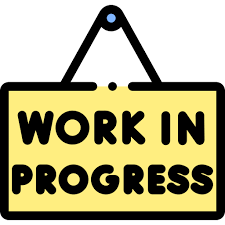
